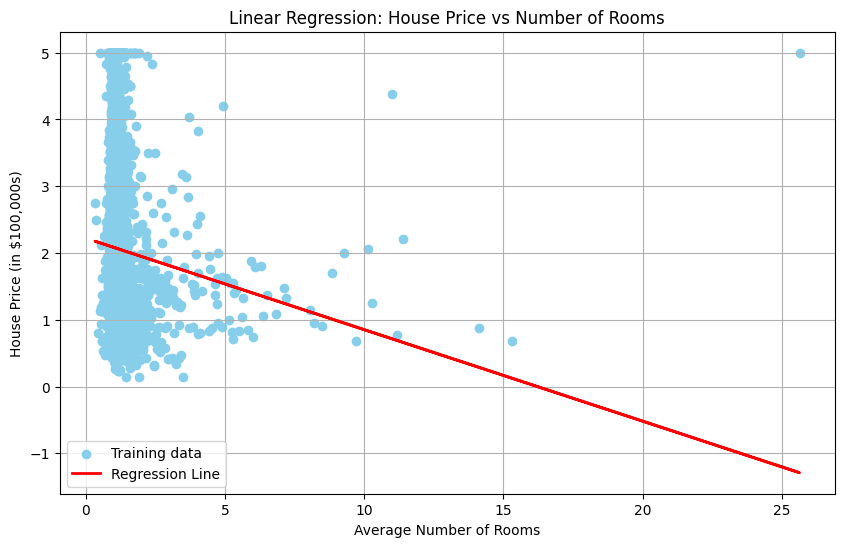

In [ ]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
data = fetch_california_housing()
X = data.data[:, [3]]  # Feature: average number of rooms (column index 3)
y = data.target        # Target: house price in $100,000s

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training data for plotting
y_pred = model.predict(X_train)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='skyblue', label='Training data')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (in $100,000s)')
plt.title('Linear Regression: House Price vs Number of Rooms')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Task 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = fetch_california_housing()
X = data.data  # All 8 numerical features
y = data.target

# Feature names for reference
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print("🔢 Model Evaluation Metrics:")
print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}\n")

# Coefficients
print("📈 Feature Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")


🔢 Model Evaluation Metrics:
R-squared: 0.576
Mean Squared Error (MSE): 0.556
Root Mean Squared Error (RMSE): 0.746

📈 Feature Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [ ]:
# Task 3
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model BEFORE Scaling ---
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

# Evaluation before scaling
r2_raw = r2_score(y_test, y_pred_raw)
mse_raw = mean_squared_error(y_test, y_pred_raw)
rmse_raw = np.sqrt(mse_raw)

# --- Apply StandardScaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model AFTER Scaling ---
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluation after scaling
r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

# --- Print Results ---
print("📊 Model Performance Comparison:")
print("Before Scaling:")
print(f"R-squared: {r2_raw:.3f}")
print(f"MSE: {mse_raw:.3f}")
print(f"RMSE: {rmse_raw:.3f}")

print("\nAfter Scaling:")
print(f"R-squared: {r2_scaled:.3f}")
print(f"MSE: {mse_scaled:.3f}")
print(f"RMSE: {rmse_scaled:.3f}")


📊 Model Performance Comparison:
Before Scaling:
R-squared: 0.576
MSE: 0.556
RMSE: 0.746

After Scaling:
R-squared: 0.576
MSE: 0.556
RMSE: 0.746


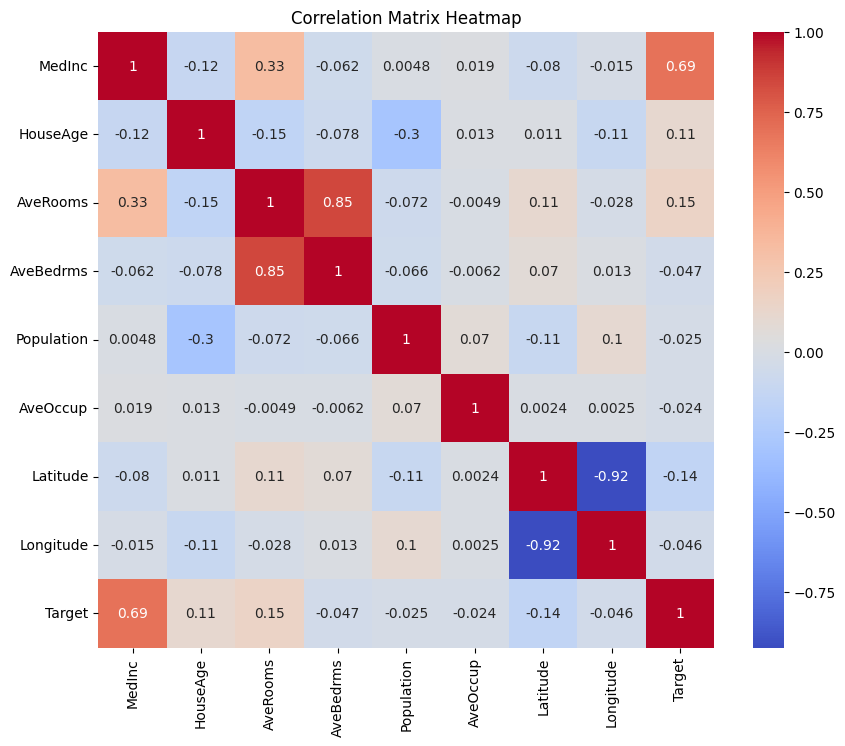

In [ ]:
# Task 4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [5]:
# Sort correlations with the target
target_corr = corr_matrix["Target"].drop("Target").sort_values(ascending=False)
print("📈 Features with Strongest Correlation to Target:")
print(target_corr)


📈 Features with Strongest Correlation to Target:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64
